# Mulitvariate Linear Regression Theory

A series of linear equations can be written as

$$ \begin{matrix}
  y^{(1)} \\
  y^{(2)} \\
  \vdots \\
  y^{(m)}
 \end{matrix}  = \begin{matrix}
  \theta_0 + \theta_1 x_1^{(1)} + \theta_2 x_2^{(1)} + \dots + \theta_n x_n^{(1)} \\
  \theta_0 + \theta_1 x_1^{(2)} + \theta_2 x_2^{(2)} + \dots + \theta_n x_n^{(2)} \\
  \vdots \\
  \theta_0 + \theta_1 x_1^{(m)} + \theta_2 x_2^{(m)} + \dots + \theta_n x_n^{(m)} \\
 \end{matrix} $$

In explicit matrix form this series can be represented as

$$ \begin{bmatrix}
  y^{(1)} \\
  y^{(2)} \\
  \vdots \\
  y^{(m)}
 \end{bmatrix}  = \begin{bmatrix}
  1 & x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)} \\
  1 & x_1^{(2)} & x_2^{(2)} & \dots & x_n^{(2)} \\
  \vdots & \vdots & \vdots & \ddots & \vdots\\
  1 & x_1^{(m)} & x_2^{(m)} & \dots & x_n^{(m)} \\
 \end{bmatrix} \begin{bmatrix}
  \theta_0 \\
  \theta_1 \\
  \vdots\\
  \theta_n
 \end{bmatrix} $$

Written in more concise and elegant implicit matrix form this becomes

$$ \mathsf Y = \mathsf X \mathsf \theta $$

That's for an exact mathematical relationship between X and Y with no error. In a real-world situation we would find the relation differs by some error vector

$$ \mathsf Y = \mathsf X \mathsf \theta + \mathsf \epsilon $$

We can alternatively look at things from an error vector perspective and say

$$ \mathsf \epsilon = \mathsf Y - \mathsf X \mathsf \theta  $$

With this perspective we're in a great position to find $\theta$ by least squares regression. We define the squared error cost function as

$$ \;\;\;\;\;\;\;\; J(\theta) = \mathsf \epsilon^T \mathsf \epsilon = \left(\mathsf Y - \mathsf X \mathsf \theta \right)^T \left( \mathsf Y  - \mathsf X \mathsf \theta \right)  = \left( \mathsf {Y^T} - \mathsf {\theta^T} \mathsf {X^T} \right) \left(\mathsf Y - \mathsf X \mathsf \theta \right) \;\;\;\;\;\;\;\; (1)$$

Now we take the derivative of both sides with respect to the vector $\theta$. We're going to have to use the chain rule, and there is some subtlety with respect to matrix differentiation that must be understood. So let's proceed slowly. 

We are dealing wth the following situation:

$$F(\theta, \theta^T) = g(\theta) h(\theta^T) $$

Now, $\theta$ and $\theta^T$ are _not_ the same, but neither are they independent. This equation cannot be differentiated by simply following the chain rule applicable to scalar variables. We must introduce some complexity to get the correct answer. The correct formula for differentiation is:


$$\frac {dF(\theta, \theta^T)}{d \theta} = \frac {d g(\theta)} {d \theta} h(\theta^T) + \left( g(\theta) \frac {d h(\theta^T)} {d \theta^T} \right)^T$$

So differentiating Eq(1) with respect to $\theta$ results in 

$$ \frac {d J(\theta)} {d \mathsf \theta} = \left( - \mathsf X^T  \left(\mathsf Y - \mathsf X \mathsf \theta \right)\right)^T - \left( \mathsf {Y^T} - \mathsf {\theta^T} \mathsf {X^T} \right) \mathsf X$$

$$ \frac {d J(\theta)} {d \mathsf \theta} =  -  \left(\mathsf Y - \mathsf X \mathsf \theta \right)^T \mathsf X - \left( \mathsf {Y^T} - \mathsf {\theta^T} \mathsf {X^T} \right) \mathsf X $$

$$ \frac {d J(\theta)} {d \mathsf \theta} =  -  \left(\mathsf Y^T - \mathsf \theta^T \mathsf X^T \right)\mathsf X - \left( \mathsf {Y^T} - \mathsf {\theta^T} \mathsf {X^T} \right) \mathsf X $$

$$ \;\;\;\;\;\;\;\; \frac {d J(\theta)} {d \mathsf \theta} =  - 2  \left(\mathsf Y^T \mathsf X - \mathsf \theta^T \mathsf X^T \mathsf X \right) \;\;\;\;\;\;\;\; (2)$$

Take notice that Eq(2) is a vector equation. The vector $\frac {dJ(\theta)}{d \theta}$ is a row vector as wide as the vector $\theta$ is tall. Now we set Eq(2) equal to 0 (in actuality, the zero vector) and solve for $\theta$. Remember that $\mathsf X$ is in general not invertible; only the product $\mathsf X^T \mathsf X$ is (ideally).

$$ \mathsf Y^T \mathsf X - \mathsf \theta^T \mathsf X^T \mathsf X = 0 $$

$$ \mathsf X^T \mathsf X \mathsf \theta = \mathsf X^T \mathsf Y   $$

$$\;\;\;\;\;\;\;\;\;\;\;\;\;\;   \mathsf \theta  = \left( \mathsf X^T \mathsf X \right)^{-1} \mathsf X^T \mathsf Y \;\;\;\;\;\;\;\; (3)$$

In principle this is the solution to any least squares linear regression problem. Using this result we can estimate  $\displaystyle \hat {\mathsf Y} = \mathsf X \mathsf \theta$.

In [1]:
data = readdlm("MLdata.txt")
# NB: if you run this notebook yourself you will get different results. I was not able
# to upload the full data set to GitHub. Sorry.

X = data[:,2:end]
Y = data[:,1]
data = 0
println("OK")

OK


It turns out there's a problem with our matrix $\mathsf X$ (I know this from experience; nothing we've done so far gives us any indication). The columns of $\mathsf X$ are not linearly independent. Not only is $\mathsf X$ not invertible, neither is $\mathsf X^T \mathsf X$. We can fix this by performing a QR decomposition. A QR decomposition decomposes $\mathsf X$ into two matrices: $\mathsf Q$, an orthonormalization of $\mathsf X$ (at least it would be were $\mathsf X$ linearly independent), and $\mathsf R$, an upper triangular square transformation matrix. It is from $\mathsf R$ that we get information on which columns of $\mathsf X$ are dependent (presumably) on columns to their left. If any pivot of $\mathsf R$ is $0$ then the column in $\mathsf X$ to with which it is associated is linearly dependent on those which came before. We can thereby eliminate column $X_i$ if the pivot of column $R_i$ is zero. 

But there's something more we can do. Recollect that the matrix $\mathsf Q$ is an orthonormalization of $\mathsf X$. That means that $\mathsf X$ and $\mathsf Q$ define the same vector subspace. Thus we can forget about $\mathsf X$ completely and use $\mathsf Q$ to find the model parameter vector $\mathsf \theta$ that satisfies least squares requirements.. So we eliminate columns from $\mathsf Q$ in exactly the same manner as discussed for $\mathsf X$ above and then substitute this truly orthonormal $\mathsf Q$ for $\mathsf X$ in eq(3):

$$\mathsf \theta = \left( \mathsf Q^T \mathsf Q\right)^{-1} \mathsf Q^T \mathsf Y$$

But $ \mathsf Q^T \mathsf Q = \mathsf I$ for any orthonormal $\mathsf Q$ so therefore we have 

$$\;\;\;\;\;\;\;\;\;\;\;\;\; \mathsf \theta = \mathsf Q^T \mathsf Y\;\;\;\;\;\;\;\; (4)$$

It's so simple and elegant, why not use it? The only case in which we would not wish to take advantage of this serendipity would be if we wanted to understand how specific columns of $\mathsf X$ influence $\mathsf Y$. All the information in $\mathsf X$ necessary to predict $\hat {\mathsf Y}$ is still present in $\mathsf Q$, but it's all scrambled up and rescaled. So use $\mathsf Q$ if you only care about prediction accuracy. Use $\mathsf X$ if you want to understand the nature and strength of various influences.

In [2]:
@time Q, R = qr(X, Val{true}) # using partial pivoting (see Strang, p.63)
n = size(R)[1]
Rtrace = sort!([R[i,i] for i=1:n], by=abs, rev=true)

X = 0

 67.281561 seconds (234.38 k allocations: 983.600 MB, 0.30% gc time)


0

Below is plotted the ranked absolute value of the pivots of $\mathsf R$ from greatest to least in magnitude. Because of numerical rounding errors we never actually see a pivot with value $0$. But we can see a big gap in pivot magnitude that we can safely assume corresponds to an effective zeroing of the pivots. But within this gap are a few pivots that may indicate (near) linear dependence, or maybe just little importance. It's difficult to say given the problems with numerical precision. In any case, empirically the fit is better when they are excluded, so exclude them we shall.

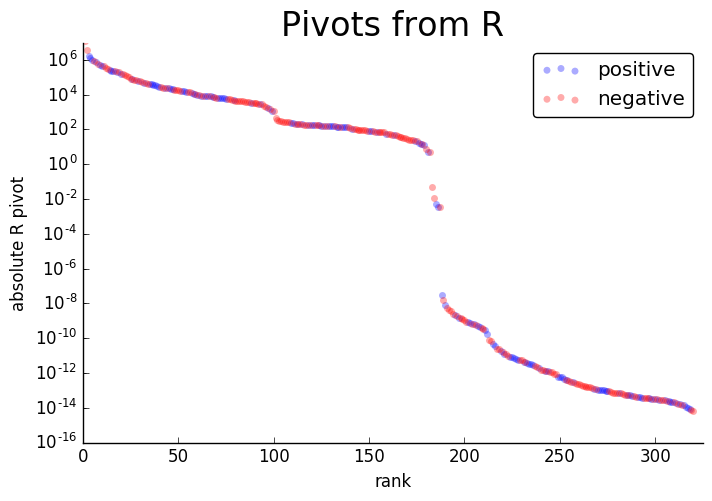

In [3]:
using PyPlot

fig = figure(figsize=(8,5))
ax = axes()
p = scatter(1:n, Rtrace, c="blue", s=25, linewidth=0, alpha=0.33, label="positive")
p = scatter(1:n, -1*Rtrace, c="red", s=25, linewidth=0, alpha=0.33, label="negative")
ax[:set_xlim]([0;325])
ax[:set_ylim]([1e-16;1e7])

xlabel("rank")
ylabel("absolute R pivot")
title("Pivots from R", fontsize=24.0)
ax[:set_yscale]("log") # Set the y axis to a logarithmic scale

legend(loc="best",fancybox="true")

ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary
ax[:xaxis][:set_ticks_position]("bottom") # Set the x-ticks to only the bottom
ax[:yaxis][:set_ticks_position]("left") # Set the y-ticks to only the left

There is no need to eliminate columns identified as dependent by $\mathsf R$ from $\mathsf Q$. Why? I'm not quite sure, but the partial pivoting seems to be doing something to the columns of $\mathsf Q$ such that the dependencies are eliminated. I need to figure out what's going on inside the shadowed box.

Let's split matrix $ \mathsf Q$ and matrix $\mathsf Y$ into training and test sets. We'll use 90% of our data for trining and the rest we'll hold back for testing.

In [4]:
N = size(Y)[1]
examples = shuffle(1:N)

cut = N÷5

test = examples[1:cut]
train = examples[cut+1:end]
println("OK")

OK


In [5]:
θ = transpose(Q[train,:])*Y[train]
println("OK")

OK


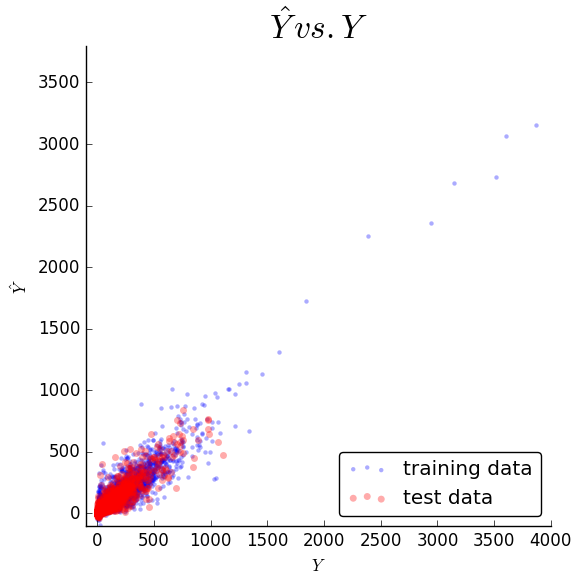

In [6]:
using PyPlot

fig = figure(figsize=(6,6))
ax = axes()
scatter(Y[train], (Q[train,:]*θ), c="blue", s=10, linewidth=0, alpha=0.33, label="training data")
scatter(Y[test], (Q[test,:]*θ), c="red", s=25, linewidth=0, alpha=0.33, label="test data")
ax[:set_xlim]([-100,4000])
ax[:set_ylim]([-100;3800])

xlabel(L"$Y$")
ylabel(L"$\hat Y$")
title(L"$\hat Y vs. Y$", fontsize=24.0)

legend(loc="lower right",fancybox="true")

ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary
ax[:xaxis][:set_ticks_position]("bottom") # Set the x-ticks to only the bottom
ax[:yaxis][:set_ticks_position]("left") # Set the y-ticks to only the left

In [7]:
MSE(X, Y, θ) = mean((Y .- X*θ).^2)

MSE (generic function with 1 method)

In [8]:
MSE(Q[test,:], Y[test], θ)

232.5278219244452

It's difficult to say if this is a good fit or a poor fit. Nevertheless let's check stability with respect to different train-test splits (same proportions)

In [9]:
function checkStability(X,Y, iters)
    N = size(Y)[1]
    MSEs = Array{Float64,1}(iters)
    for i = 1:iters
        examples = shuffle(1:N)
        cut = N÷5
        test = examples[1:cut]
        train = examples[cut+1:end]
        θ = transpose(X[train,:])*Y[train]
        MSEs[i] = MSE(X[test,:], Y[test], θ)
    end
    return MSEs
end

checkStability (generic function with 1 method)

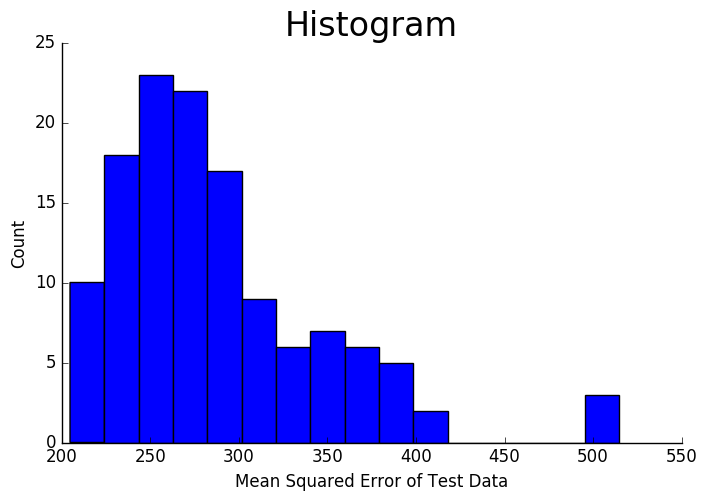

MSE: mean: 288.410068; std: 58.886716


In [26]:
using PyPlot
MSEs = checkStability(Q,Y, 128)

fig = figure(figsize=(8,5))
ax = axes()
plt[:hist](MSEs,16) # Histogram

xlabel("Mean Squared Error of Test Data")
ylabel("Count")
title("Histogram", fontsize=24.0)

ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary
ax[:xaxis][:set_ticks_position]("bottom") # Set the x-ticks to only the bottom
ax[:yaxis][:set_ticks_position]("left") # Set the y-ticks to only the left


println("MSE: mean: $(round(mean(MSEs),6)); std: $(round(std(MSEs), 6))")

Stability looks not too bad. Not great, but there's no obvious sign of something pathological.